In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dataprep.eda import plot, plot_correlation, plot_missing
from bs4 import BeautifulSoup
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

NumExpr defaulting to 4 threads.


In [2]:
data = pd.read_json('../data/model_data_v1.json', orient='records', lines=True)
text_columns = ["description", "name", "org_desc", "org_name"]
features_target = text_columns + ["is_fraud"]
df_text = data.loc[:, features_target].copy()

In [16]:
df_text['desc_soup'] = df_text['description'].apply(lambda x: BeautifulSoup(x, 'html.parser'))

In [24]:
for i in range(50):
    print(df_text.loc[i,'desc_soup'])
    print("-"*30)
    print(df_text.loc[i,'desc_soup'].get_text("|", strip=True))
    print("="*30)

<p><span style="font-size: medium;"><strong>Bring your kids to the library to paint a pumpkin and listen to the Bakerville Library Witch tell some not too scary Halloween stories. Refreshments will also be served.</strong></span><br/><br/><span style="font-size: small;">Space is limited to the first 25 registrants, so to reserve a seat, contact the Bakerville Library at (860) 482-8806 or bakerville.library@snet.net. This event is free to the public but donations are always welcomed and appreciated.</span></p>
------------------------------
Bring your kids to the library to paint a pumpkin and listen to the Bakerville Library Witch tell some not too scary Halloween stories. Refreshments will also be served.|Space is limited to the first 25 registrants, so to reserve a seat, contact the Bakerville Library at (860) 482-8806 or bakerville.library@snet.net. This event is free to the public but donations are always welcomed and appreciated.
Unknown
------------------------------
Unknown
<p><

In [19]:
plot(df_text, 'desc_soup')

/home/jeff/anaconda3/lib/python3.7/site-packages/dask/dataframe/accessor.py:48: FutureWarning: The default value of regex will change from True to False in a future version.
  out = getattr(getattr(obj, accessor, obj), attr)(*args, **kwargs)


  0%|          | 0/75 [00:00<?, ?it/s]

TypeError: '<' not supported between instances of 'BeautifulSoup' and 'BeautifulSoup'

In [4]:
stopwords = []
text = " ".join(review for review in df_text['org_desc'].astype(str))
text.count("Unknown")

4934

In [5]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white",
                      width=800, height=400).generate(text)

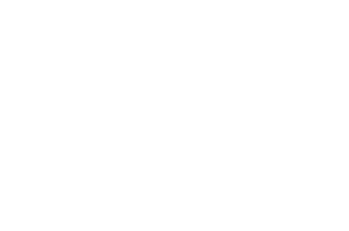

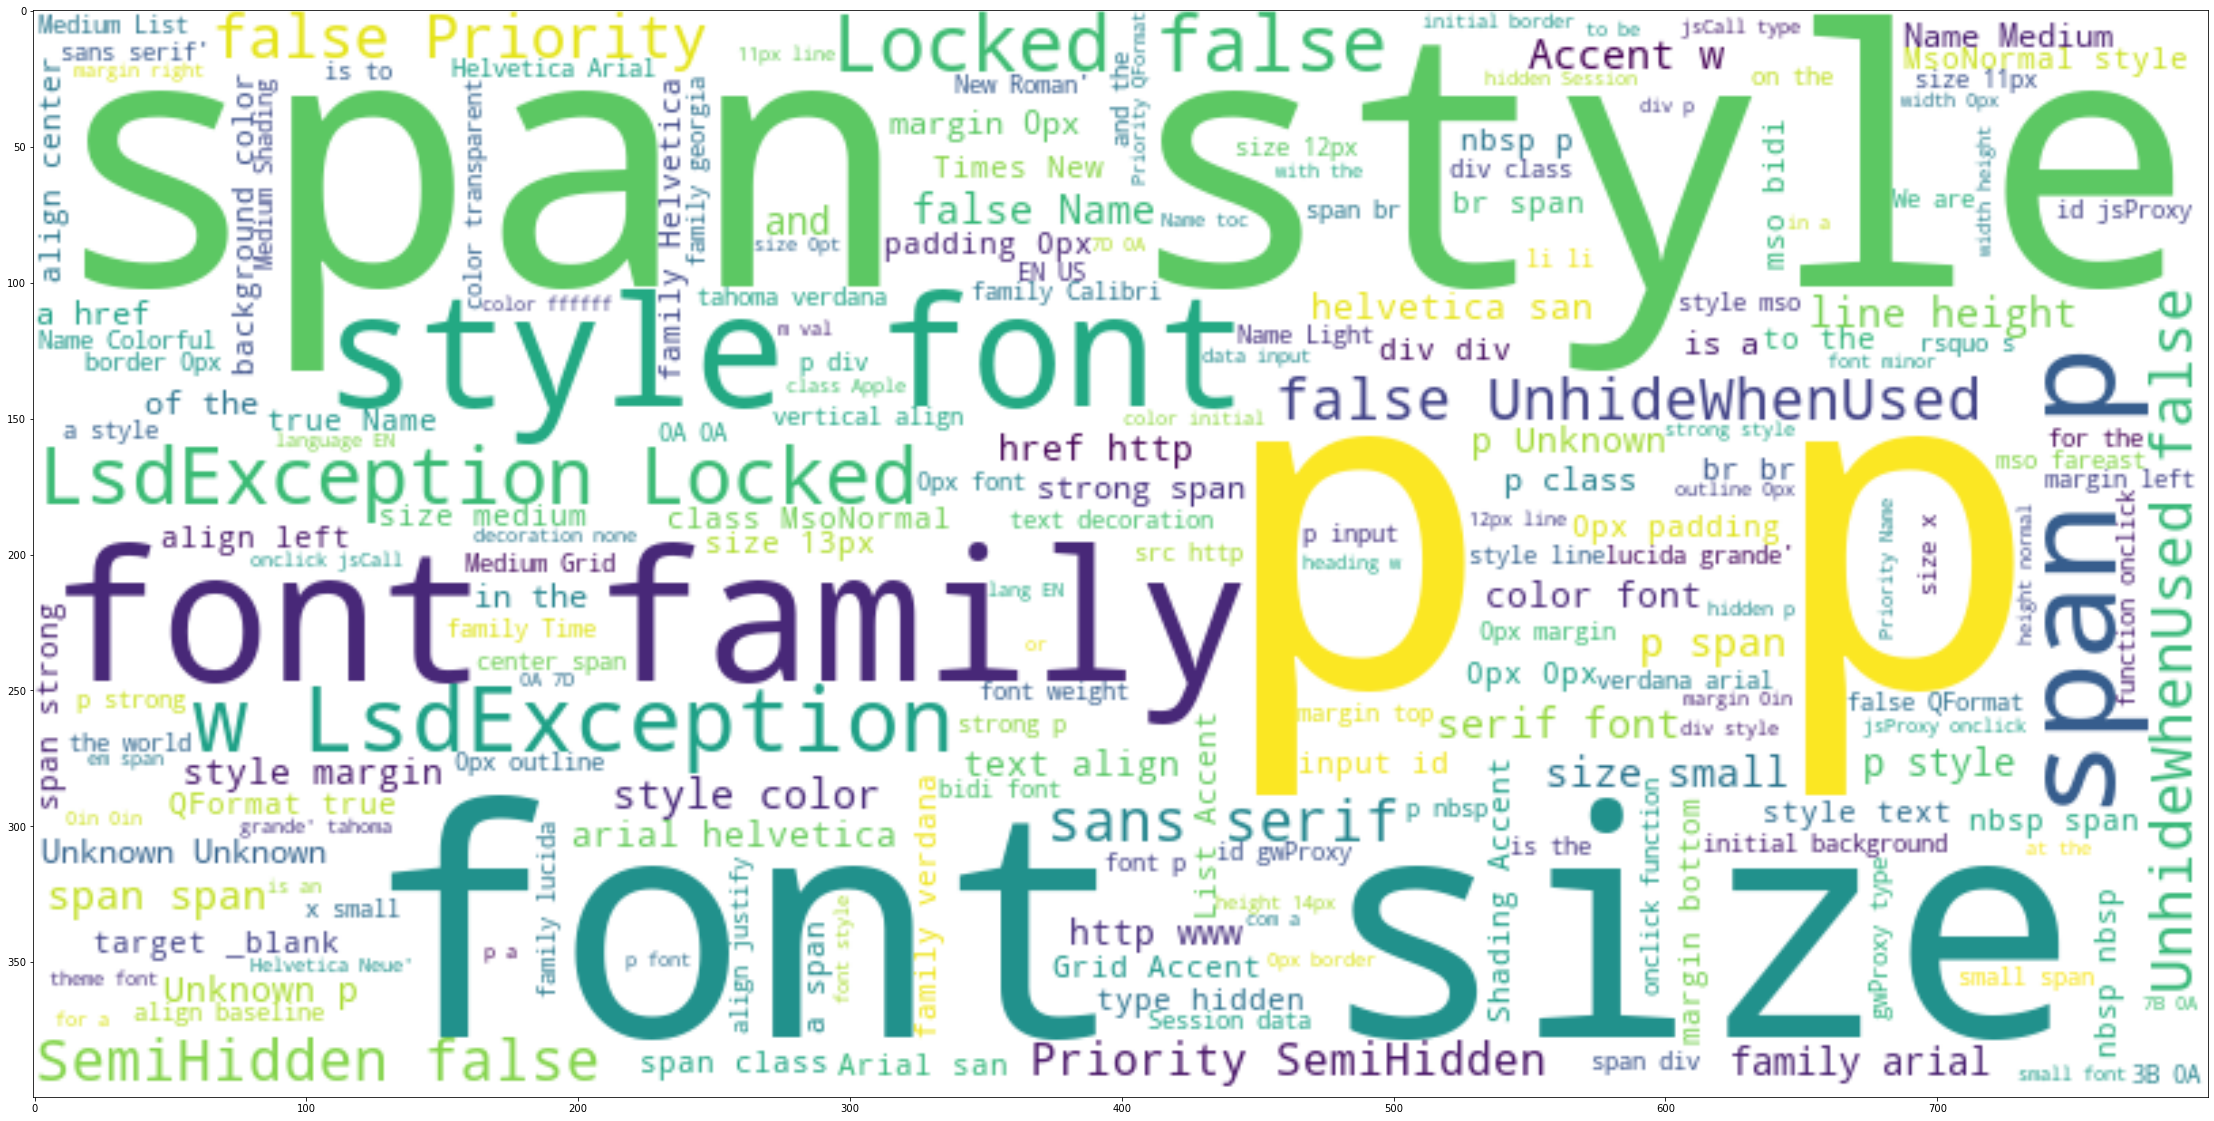

In [6]:
plt.axis("off")

plt.figure(figsize=(40,20))

plt.tight_layout(pad=0)

plt.imshow(wordcloud, interpolation='bilinear')

plt.show()